In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="Latin America") & (data.business_area_name=="B00 - LTC")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
58,B00 - LTC,Latin America,2017-01-01,1069308.42
83,B00 - LTC,Latin America,2017-02-01,1288721.62
107,B00 - LTC,Latin America,2017-03-01,1510412.38
127,B00 - LTC,Latin America,2017-04-01,1534186.79
157,B00 - LTC,Latin America,2017-05-01,1491049.37


,date,sales
0,2017-01-01,1069308.42
1,2017-02-01,1288721.62
2,2017-03-01,1510412.38
3,2017-04-01,1534186.79
4,2017-05-01,1491049.37


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

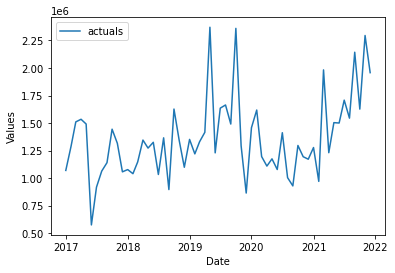

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

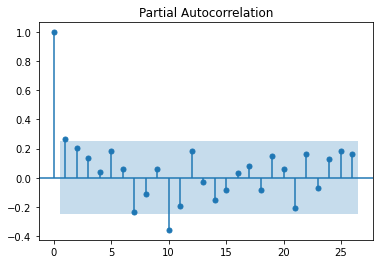

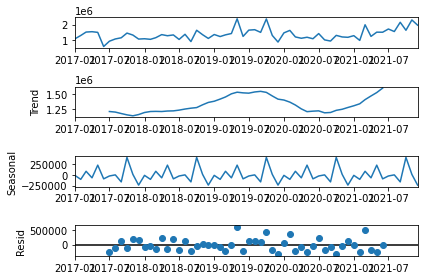

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 110s 110s/step - loss: 0.4225 - val_loss: 0.5311
Epoch 2/200
1/1 [==============================] - 0s 345ms/step - loss: 0.4127 - val_loss: 0.5142
Epoch 3/200
1/1 [==============================] - 0s 375ms/step - loss: 0.3958 - val_loss: 0.4817
Epoch 4/200
1/1 [==============================] - 0s 341ms/step - loss: 0.3633 - val_loss: 0.4160
Epoch 5/200
1/1 [==============================] - 0s 316ms/step - loss: 0.2982 - val_loss: 0.2932
Epoch 6/200
1/1 [==============================] - 0s 331ms/step - loss: 0.1939 - val_loss: 0.2411
Epoch 7/200
1/1 [==============================] - 0s 310ms/step - loss: 0.2554 - val_loss: 0.2045
Epoch 8/200
1/1 [==============================] - 0s 358ms/step - loss: 0.1946 - val_loss: 0.2023
Epoch 9/200
1/1 [==============================] - 0s 312ms/step - loss: 0.1333 - val_loss: 0.2468
Epoch 10/200
1/1 [==============================] - 0s 314ms/step - loss: 0.1467 - val_loss: 0.2676
Epoch 11

1/1 [==============================] - 0s 275ms/step - loss: 0.1240 - val_loss: 0.2150
Epoch 84/200
1/1 [==============================] - 0s 279ms/step - loss: 0.1238 - val_loss: 0.2159
Epoch 85/200
1/1 [==============================] - 0s 273ms/step - loss: 0.1240 - val_loss: 0.2149
Epoch 86/200
1/1 [==============================] - 0s 274ms/step - loss: 0.1240 - val_loss: 0.2140
Epoch 87/200
1/1 [==============================] - 0s 277ms/step - loss: 0.1238 - val_loss: 0.2142
Epoch 88/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1238 - val_loss: 0.2140
Epoch 89/200
1/1 [==============================] - 0s 283ms/step - loss: 0.1239 - val_loss: 0.2141
Epoch 90/200
1/1 [==============================] - 0s 286ms/step - loss: 0.1240 - val_loss: 0.2141
Epoch 91/200
1/1 [==============================] - 0s 269ms/step - loss: 0.1241 - val_loss: 0.2142
Epoch 92/200
1/1 [==============================] - 0s 288ms/step - loss: 0.1239 - val_loss: 0.2141
Epoch 93/200


1/1 [==============================] - 0s 269ms/step - loss: 0.1240 - val_loss: 0.2131
Epoch 165/200
1/1 [==============================] - 0s 275ms/step - loss: 0.1238 - val_loss: 0.2126
Epoch 166/200
1/1 [==============================] - 0s 264ms/step - loss: 0.1238 - val_loss: 0.2130
Epoch 167/200
1/1 [==============================] - 0s 268ms/step - loss: 0.1238 - val_loss: 0.2143
Epoch 168/200
1/1 [==============================] - 0s 270ms/step - loss: 0.1240 - val_loss: 0.2138
Epoch 169/200
1/1 [==============================] - 0s 293ms/step - loss: 0.1241 - val_loss: 0.2130
Epoch 170/200
1/1 [==============================] - 0s 281ms/step - loss: 0.1241 - val_loss: 0.2130
Epoch 171/200
1/1 [==============================] - 0s 316ms/step - loss: 0.1240 - val_loss: 0.2134
Epoch 172/200
1/1 [==============================] - 0s 313ms/step - loss: 0.1239 - val_loss: 0.2151
Epoch 173/200
1/1 [==============================] - 0s 287ms/step - loss: 0.1239 - val_loss: 0.2156
Epoc

Epoch 46/200
2/2 [==============================] - 0s 246ms/step - loss: 0.1359 - val_loss: 0.2161
Epoch 47/200
2/2 [==============================] - 0s 236ms/step - loss: 0.1356 - val_loss: 0.2284
Epoch 48/200
2/2 [==============================] - 0s 252ms/step - loss: 0.1400 - val_loss: 0.2273
Epoch 49/200
2/2 [==============================] - 0s 236ms/step - loss: 0.1402 - val_loss: 0.2134
Epoch 50/200
2/2 [==============================] - 0s 262ms/step - loss: 0.1359 - val_loss: 0.1959
Epoch 51/200
2/2 [==============================] - 0s 226ms/step - loss: 0.1376 - val_loss: 0.1910
Epoch 52/200
2/2 [==============================] - 0s 234ms/step - loss: 0.1388 - val_loss: 0.1962
Epoch 53/200
2/2 [==============================] - 0s 248ms/step - loss: 0.1355 - val_loss: 0.2049
Epoch 54/200
2/2 [==============================] - 0s 248ms/step - loss: 0.1344 - val_loss: 0.2114
Epoch 55/200
2/2 [==============================] - 0s 259ms/step - loss: 0.1346 - val_loss: 0.2129


2/2 [==============================] - 1s 283ms/step - loss: 0.1373 - val_loss: 0.1999
Epoch 128/200
2/2 [==============================] - 1s 292ms/step - loss: 0.1380 - val_loss: 0.2059
Epoch 129/200
2/2 [==============================] - 1s 298ms/step - loss: 0.1366 - val_loss: 0.2135
Epoch 130/200
2/2 [==============================] - 1s 288ms/step - loss: 0.1352 - val_loss: 0.2167
Epoch 131/200
2/2 [==============================] - 1s 298ms/step - loss: 0.1353 - val_loss: 0.2150
Epoch 132/200
2/2 [==============================] - 1s 293ms/step - loss: 0.1350 - val_loss: 0.2079
Epoch 133/200
2/2 [==============================] - 1s 294ms/step - loss: 0.1346 - val_loss: 0.2025
Epoch 134/200
2/2 [==============================] - 1s 295ms/step - loss: 0.1356 - val_loss: 0.2020
Epoch 135/200
2/2 [==============================] - 1s 286ms/step - loss: 0.1359 - val_loss: 0.2055
Epoch 136/200
2/2 [==============================] - 1s 305ms/step - loss: 0.1353 - val_loss: 0.2119
Epoc

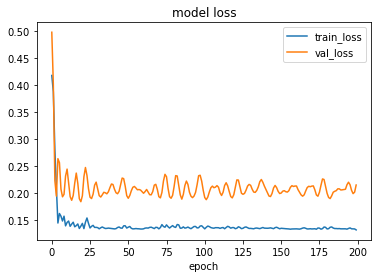

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

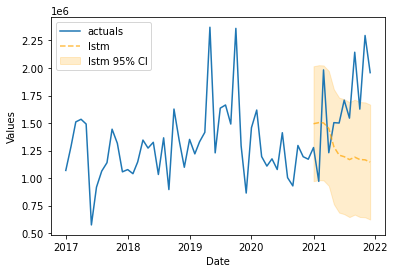

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

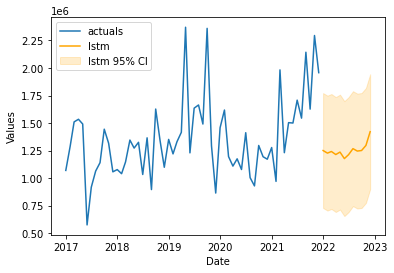

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.31,592116.38,-1.47,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,2015764.54,1493682.39,1277399.05,971600.25,lstm,0.95
1,2021-02-01,2025628.38,1503546.23,969799.12,981464.08,lstm,0.95
2,2021-03-01,2023330.97,1501248.82,1982870.35,979166.67,lstm,0.95
3,2021-04-01,1973576.12,1451493.98,1230397.31,929411.83,lstm,0.95
4,2021-05-01,1806596.22,1284514.07,1503575.20,762431.93,lstm,0.95
5,2021-06-01,1730309.32,1208227.17,1500081.98,686145.02,lstm,0.95
6,2021-07-01,1716228.27,1194146.13,1707960.99,672063.98,lstm,0.95
7,2021-08-01,1689724.96,1167642.81,1544491.05,645560.66,lstm,0.95
8,2021-09-01,1712084.20,1190002.05,2143410.36,667919.90,lstm,0.95
9,2021-10-01,1690487.32,1168405.17,1626473.08,646323.02,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,1772134.46,1250052.31,727970.16,lstm,0.95
1,2022-02-01,1748633.31,1226551.16,704469.02,lstm,0.95
2,2022-03-01,1763438.49,1241356.34,719274.20,lstm,0.95
3,2022-04-01,1735864.04,1213781.89,691699.74,lstm,0.95
4,2022-05-01,1757923.87,1235841.72,713759.57,lstm,0.95
5,2022-06-01,1698908.45,1176826.30,654744.15,lstm,0.95
6,2022-07-01,1734857.51,1212775.37,690693.22,lstm,0.95
7,2022-08-01,1789286.67,1267204.53,745122.38,lstm,0.95
8,2022-09-01,1767362.28,1245280.13,723197.99,lstm,0.95
9,2022-10-01,1772341.68,1250259.54,728177.39,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:19739737.195622
Total_2022:15037658.315706355
YOY (growth):-23.820372243651253
